In [1]:
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime

from tensorflow import keras
from keras_preprocessing.image import ImageDataGenerator
import tensorflow as tf


from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical

from keras.applications import ResNet50
from keras.applications.resnet import preprocess_input

from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras import regularizers, optimizers

from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard

from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
# tf.config.list_physical_devices('GPU')



In [3]:
# physical_devices = tf.config.list_physical_devices('GPU')
# try:
#     tf.config.experimental.set_memory_growth(physical_devices[0], True)
# except:
#     pass

In [4]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

# Creating a baseline solution

In [5]:
IMG_SIZE = (250,250)
BATCH_SIZE = 32

In [10]:
trainDataAug = ImageDataGenerator(
        rescale=1. / 255.,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,       
        shear_range=0.05,
        validation_split=0.25)

In [11]:
# valDataAug = ImageDataGenerator(
#         rescale=1./255.,
#         validation_split=0.10)

In [12]:
train_dataset= trainDataAug.flow_from_directory(
                                             directory='Dataset/First50/',
                                             subset="training",
                                             batch_size=BATCH_SIZE,
                                             target_size=IMG_SIZE
                                             )

Found 41 images belonging to 11 classes.


In [13]:
validation_dataset=trainDataAug.flow_from_directory(
                                             directory='Dataset/First50/',
                                             subset="validation",
                                             batch_size=BATCH_SIZE,
                                             target_size=IMG_SIZE
                                             )

Found 9 images belonging to 11 classes.


In [18]:
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (250,250,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(11, activation = "softmax"))

In [19]:

model.compile(optimizer = 'adam', loss = [keras.losses.CategoricalCrossentropy()], metrics = ['acc'])

In [20]:

my_calback_object = TensorBoard(log_dir='logs/',write_images=True,update_freq='epoch')


In [21]:
history = model.fit(train_dataset,
                    epochs=40,
                    validation_data=validation_dataset,
                    callbacks=[my_calback_object])

Epoch 1/40
2/2 [==============================] - 3s 475ms/step - loss: 6.5386 - acc: 0.0732 - val_loss: 5.3826 - val_acc: 0.2222
Epoch 2/40
2/2 [==============================] - 1s 253ms/step - loss: 13.2769 - acc: 0.1951 - val_loss: 5.5504 - val_acc: 0.1111
Epoch 3/40
2/2 [==============================] - 1s 232ms/step - loss: 17.4223 - acc: 0.0244 - val_loss: 2.9866 - val_acc: 0.2222
Epoch 4/40
2/2 [==============================] - 1s 213ms/step - loss: 9.0727 - acc: 0.1220 - val_loss: 2.3808 - val_acc: 0.1111
Epoch 5/40
2/2 [==============================] - 1s 240ms/step - loss: 4.4907 - acc: 0.0732 - val_loss: 2.2654 - val_acc: 0.2222
Epoch 6/40
2/2 [==============================] - 1s 193ms/step - loss: 2.6759 - acc: 0.1707 - val_loss: 2.3305 - val_acc: 0.2222
Epoch 7/40
2/2 [==============================] - 1s 530ms/step - loss: 2.3819 - acc: 0.1463 - val_loss: 2.3511 - val_acc: 0.2222
Epoch 8/40
2/2 [==============================] - 1s 521ms/step - loss: 2.3469 - acc: 0.

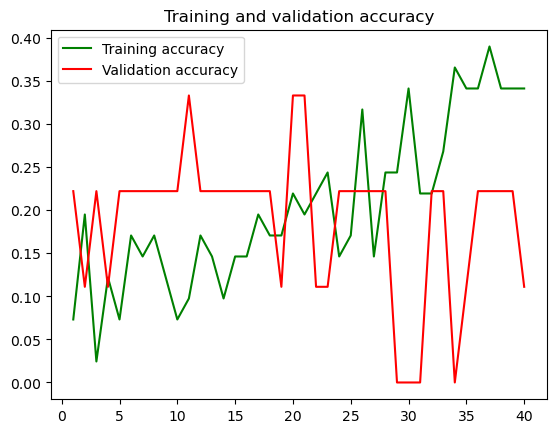

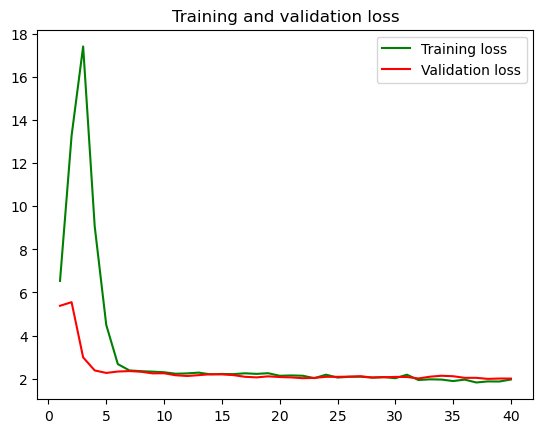

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()